In [1]:
import json
import glob
import ast

import pandas as pd
pd.options.mode.chained_assignment = None
from tqdm.notebook import tqdm
tqdm.pandas()

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
author_gender_df = pd.read_csv('data/dblp/author_gender.csv')
author_gender_df

,id,name,org,gender,confidence
0,1898054021,Ioannis Delis,"Department of Biomedical Sciences, University ...",male,0.98
1,2645550909,Pauline Hilt,"Fondazione Istituto Italiano di Tecnologia, Ce...",male,0.88
2,531415370,Thierry Pozzo,"Fondazione Istituto Italiano di Tecnologia, Ce...",male,0.99
3,322723101,Stefano Panzeri,"Neural Computation Laboratory, Center for Neur...",male,0.99
4,79947125,Bastien Berret,"Univ. Paris-Sud, Université Paris-Saclay, Orsa...",male,0.83
...,...,...,...,...,...
4398133,2962813519,Je-Kwang Ryu,NaN,male,0.98
4398134,2964296278,Boyuan Kong,Dept. of Electrical Engineering and Computer S...,male,0.96
4398135,2963126023,Fahem Kebair,NaN,male,0.94
4398136,2473832003,Asmaa H. Elsaid,"Information Systems Department, Faculty of Com...",female,0.91


In [3]:
author_gender_df.fillna("", inplace=True)
author_gender_df

,id,name,org,gender,confidence
0,1898054021,Ioannis Delis,"Department of Biomedical Sciences, University ...",male,0.98
1,2645550909,Pauline Hilt,"Fondazione Istituto Italiano di Tecnologia, Ce...",male,0.88
2,531415370,Thierry Pozzo,"Fondazione Istituto Italiano di Tecnologia, Ce...",male,0.99
3,322723101,Stefano Panzeri,"Neural Computation Laboratory, Center for Neur...",male,0.99
4,79947125,Bastien Berret,"Univ. Paris-Sud, Université Paris-Saclay, Orsa...",male,0.83
...,...,...,...,...,...
4398133,2962813519,Je-Kwang Ryu,,male,0.98
4398134,2964296278,Boyuan Kong,Dept. of Electrical Engineering and Computer S...,male,0.96
4398135,2963126023,Fahem Kebair,,male,0.94
4398136,2473832003,Asmaa H. Elsaid,"Information Systems Department, Faculty of Com...",female,0.91


In [4]:
# Check confidence distribution

author_gender_df['confidence'].describe()

count   4398138.00
mean          0.88
std           0.14
min           0.50
25%           0.80
50%           0.95
75%           0.98
max           0.99
Name: confidence, dtype: float64

In [5]:
id2author = author_gender_df.set_index('id').to_dict('index')
len(id2author)

4398138

In [6]:
id2author[1898054021]

{'name': 'Ioannis Delis',
 'org': 'Department of Biomedical Sciences, University of Leeds, Leeds, UK',
 'gender': 'male',
 'confidence': 0.9823}

In [7]:
id2author[2645550909]

{'name': 'Pauline Hilt',
 'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy',
 'gender': 'male',
 'confidence': 0.8822}

In [8]:
id2author[2963126023]

{'name': 'Fahem Kebair', 'org': '', 'gender': 'male', 'confidence': 0.9441}

In [9]:
df = pd.read_csv('data/dblp/data.csv', low_memory=False)
df

,id,title,authors,n_citation,year,doc_type,publisher,venue_id,venue_str,references
0,2873507692,Characterization of whole-body muscle activity...,"[{'name': 'Ioannis Delis', 'org': 'Department ...",0,2018,Conference,ACM,1124396182.00,Hellenic Conference on Artificial Intelligence,"[1973012362, 1975079024, 2008605701, 206338057..."
1,2873533962,The effect of codebook design on the BER perfo...,"[{'name': 'Ferdi Tekce', 'org': 'Elektronik ve...",0,2018,Conference,IEEE,2735422400.00,Signal Processing and Communications Applicati...,"[2008104692, 2042519026, 2054692642, 211076718..."
2,2873535434,An Optimized Infrared Detection Strategy for D...,"[{'name': 'Li Cheng', 'org': 'School of Electr...",0,2018,Journal,Institute of Electrical and Electronics Engine...,2485537415.00,IEEE Access,[2793612255]
3,2873541924,Unsupervised Natural Image Patch Learning,"[{'name': 'Dov Danon', 'id': 2230089554}, {'na...",0,2018,Repository,NaN,2597175965.00,arXiv: Computer Vision and Pattern Recognition,"[2078790577, 2550791380, 2950187998]"
4,2873550248,Age-associated increase in mnemonic strategy u...,"[{'name': 'Qijing Yu', 'org': 'Psychology Depa...",2,2018,Journal,Academic Press,103225281.00,NeuroImage,"[2049056222, 2101135654, 2783148479]"
...,...,...,...,...,...,...,...,...,...,...
4894076,2963831124,A Dynamic Window Neural Network for CCG Supert...,"[{'name': 'Huijia Wu', 'id': 2531734576}, {'na...",0,2016,Conference,NaN,1184914352.00,National Conference on Artificial Intelligence,NaN
4894077,2963831130,Efficient implementation of quantum circuits w...,"[{'name': 'Stephen Brierley', 'org': 'DAMTP, C...",3,2017,Journal,"Rinton Press, Incorporated",41034432.00,Quantum Information & Computation,[2401457073]
4894078,2963831170,A Dataset for Building Code-Mixed Goal Oriente...,"[{'name': 'Suman Banerjee', 'id': 2808453915},...",0,2018,Conference,NaN,1169674987.00,International Conference on Computational Ling...,NaN
4894079,2963831230,Modal operators and toric ideals,"[{'name': 'Riccardo Camerlo', 'org': 'Dipartim...",0,2019,Journal,Oxford University Press (OUP),47057106.00,Journal of Logic and Computation,[2610670723]


In [10]:
df.fillna("", inplace=True)
df

,id,title,authors,n_citation,year,doc_type,publisher,venue_id,venue_str,references
0,2873507692,Characterization of whole-body muscle activity...,"[{'name': 'Ioannis Delis', 'org': 'Department ...",0,2018,Conference,ACM,1124396182.00,Hellenic Conference on Artificial Intelligence,"[1973012362, 1975079024, 2008605701, 206338057..."
1,2873533962,The effect of codebook design on the BER perfo...,"[{'name': 'Ferdi Tekce', 'org': 'Elektronik ve...",0,2018,Conference,IEEE,2735422400.00,Signal Processing and Communications Applicati...,"[2008104692, 2042519026, 2054692642, 211076718..."
2,2873535434,An Optimized Infrared Detection Strategy for D...,"[{'name': 'Li Cheng', 'org': 'School of Electr...",0,2018,Journal,Institute of Electrical and Electronics Engine...,2485537415.00,IEEE Access,[2793612255]
3,2873541924,Unsupervised Natural Image Patch Learning,"[{'name': 'Dov Danon', 'id': 2230089554}, {'na...",0,2018,Repository,,2597175965.00,arXiv: Computer Vision and Pattern Recognition,"[2078790577, 2550791380, 2950187998]"
4,2873550248,Age-associated increase in mnemonic strategy u...,"[{'name': 'Qijing Yu', 'org': 'Psychology Depa...",2,2018,Journal,Academic Press,103225281.00,NeuroImage,"[2049056222, 2101135654, 2783148479]"
...,...,...,...,...,...,...,...,...,...,...
4894076,2963831124,A Dynamic Window Neural Network for CCG Supert...,"[{'name': 'Huijia Wu', 'id': 2531734576}, {'na...",0,2016,Conference,,1184914352.00,National Conference on Artificial Intelligence,
4894077,2963831130,Efficient implementation of quantum circuits w...,"[{'name': 'Stephen Brierley', 'org': 'DAMTP, C...",3,2017,Journal,"Rinton Press, Incorporated",41034432.00,Quantum Information & Computation,[2401457073]
4894078,2963831170,A Dataset for Building Code-Mixed Goal Oriente...,"[{'name': 'Suman Banerjee', 'id': 2808453915},...",0,2018,Conference,,1169674987.00,International Conference on Computational Ling...,
4894079,2963831230,Modal operators and toric ideals,"[{'name': 'Riccardo Camerlo', 'org': 'Dipartim...",0,2019,Journal,Oxford University Press (OUP),47057106.00,Journal of Logic and Computation,[2610670723]


In [11]:
df['authors'].iloc[0]

"[{'name': 'Ioannis Delis', 'org': 'Department of Biomedical Sciences, University of Leeds, Leeds, UK', 'id': 1898054021}, {'name': 'Pauline Hilt', 'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy', 'id': 2645550909}, {'name': 'Thierry Pozzo', 'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy', 'id': 531415370}, {'name': 'Stefano Panzeri', 'org': 'Neural Computation Laboratory, Center for Neuroscience and Cognitive Systems@UniTn, Istituto Italiano di Tecnologia, Rovereto (TN), Italy', 'id': 322723101}, {'name': 'Bastien Berret', 'org': 'Univ. Paris-Sud, Université Paris-Saclay, Orsay Cedex, France', 'id': 79947125}]"

In [12]:
ast.literal_eval(df['authors'].iloc[0])

[{'name': 'Ioannis Delis',
  'org': 'Department of Biomedical Sciences, University of Leeds, Leeds, UK',
  'id': 1898054021},
 {'name': 'Pauline Hilt',
  'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy',
  'id': 2645550909},
 {'name': 'Thierry Pozzo',
  'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy',
  'id': 531415370},
 {'name': 'Stefano Panzeri',
  'org': 'Neural Computation Laboratory, Center for Neuroscience and Cognitive Systems@UniTn, Istituto Italiano di Tecnologia, Rovereto (TN), Italy',
  'id': 322723101},
 {'name': 'Bastien Berret',
  'org': 'Univ. Paris-Sud, Université Paris-Saclay, Orsay Cedex, France',
  'id': 79947125}]

In [13]:
sample_authors = ast.literal_eval(df['authors'].iloc[0])
sample_authors

[{'name': 'Ioannis Delis',
  'org': 'Department of Biomedical Sciences, University of Leeds, Leeds, UK',
  'id': 1898054021},
 {'name': 'Pauline Hilt',
  'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy',
  'id': 2645550909},
 {'name': 'Thierry Pozzo',
  'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy',
  'id': 531415370},
 {'name': 'Stefano Panzeri',
  'org': 'Neural Computation Laboratory, Center for Neuroscience and Cognitive Systems@UniTn, Istituto Italiano di Tecnologia, Rovereto (TN), Italy',
  'id': 322723101},
 {'name': 'Bastien Berret',
  'org': 'Univ. Paris-Sud, Université Paris-Saclay, Orsay Cedex, France',
  'id': 79947125}]

In [14]:
sample_ids = [
    x['id'] for x in sample_authors
]
sample_ids

[1898054021, 2645550909, 531415370, 322723101, 79947125]

In [15]:
[
    id2author[id] for id in sample_ids
]

[{'name': 'Ioannis Delis',
  'org': 'Department of Biomedical Sciences, University of Leeds, Leeds, UK',
  'gender': 'male',
  'confidence': 0.9823},
 {'name': 'Pauline Hilt',
  'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy',
  'gender': 'male',
  'confidence': 0.8822},
 {'name': 'Thierry Pozzo',
  'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy',
  'gender': 'male',
  'confidence': 0.9869},
 {'name': 'Stefano Panzeri',
  'org': 'Neural Computation Laboratory, Center for Neuroscience and Cognitive Systems@UniTn, Istituto Italiano di Tecnologia, Rovereto (TN), Italy',
  'gender': 'male',
  'confidence': 0.9862},
 {'name': 'Bastien Berret',
  'org': 'Univ. Paris-Sud, Université Paris-Saclay, Orsay Cedex, France',
  'gender': 'male',
  'confidence': 0.8313}]

In [16]:
def to_list(authors):
    """
    Convert authors to list
    """
    _authors = []
    if authors:
        _authors = ast.literal_eval(authors)
    return _authors

In [17]:
to_list("")

[]

In [18]:
# Convert authors string to list datatype

df['authors'] = df['authors'].progress_apply(lambda x: to_list(x))
df

  0%|          | 0/4894081 [00:00<?, ?it/s]

,id,title,authors,n_citation,year,doc_type,publisher,venue_id,venue_str,references
0,2873507692,Characterization of whole-body muscle activity...,"[{'name': 'Ioannis Delis', 'org': 'Department ...",0,2018,Conference,ACM,1124396182.00,Hellenic Conference on Artificial Intelligence,"[1973012362, 1975079024, 2008605701, 206338057..."
1,2873533962,The effect of codebook design on the BER perfo...,"[{'name': 'Ferdi Tekce', 'org': 'Elektronik ve...",0,2018,Conference,IEEE,2735422400.00,Signal Processing and Communications Applicati...,"[2008104692, 2042519026, 2054692642, 211076718..."
2,2873535434,An Optimized Infrared Detection Strategy for D...,"[{'name': 'Li Cheng', 'org': 'School of Electr...",0,2018,Journal,Institute of Electrical and Electronics Engine...,2485537415.00,IEEE Access,[2793612255]
3,2873541924,Unsupervised Natural Image Patch Learning,"[{'name': 'Dov Danon', 'id': 2230089554}, {'na...",0,2018,Repository,,2597175965.00,arXiv: Computer Vision and Pattern Recognition,"[2078790577, 2550791380, 2950187998]"
4,2873550248,Age-associated increase in mnemonic strategy u...,"[{'name': 'Qijing Yu', 'org': 'Psychology Depa...",2,2018,Journal,Academic Press,103225281.00,NeuroImage,"[2049056222, 2101135654, 2783148479]"
...,...,...,...,...,...,...,...,...,...,...
4894076,2963831124,A Dynamic Window Neural Network for CCG Supert...,"[{'name': 'Huijia Wu', 'id': 2531734576}, {'na...",0,2016,Conference,,1184914352.00,National Conference on Artificial Intelligence,
4894077,2963831130,Efficient implementation of quantum circuits w...,"[{'name': 'Stephen Brierley', 'org': 'DAMTP, C...",3,2017,Journal,"Rinton Press, Incorporated",41034432.00,Quantum Information & Computation,[2401457073]
4894078,2963831170,A Dataset for Building Code-Mixed Goal Oriente...,"[{'name': 'Suman Banerjee', 'id': 2808453915},...",0,2018,Conference,,1169674987.00,International Conference on Computational Ling...,
4894079,2963831230,Modal operators and toric ideals,"[{'name': 'Riccardo Camerlo', 'org': 'Dipartim...",0,2019,Journal,Oxford University Press (OUP),47057106.00,Journal of Logic and Computation,[2610670723]


In [19]:
df['authors'].iloc[0]

[{'name': 'Ioannis Delis',
  'org': 'Department of Biomedical Sciences, University of Leeds, Leeds, UK',
  'id': 1898054021},
 {'name': 'Pauline Hilt',
  'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy',
  'id': 2645550909},
 {'name': 'Thierry Pozzo',
  'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy',
  'id': 531415370},
 {'name': 'Stefano Panzeri',
  'org': 'Neural Computation Laboratory, Center for Neuroscience and Cognitive Systems@UniTn, Istituto Italiano di Tecnologia, Rovereto (TN), Italy',
  'id': 322723101},
 {'name': 'Bastien Berret',
  'org': 'Univ. Paris-Sud, Université Paris-Saclay, Orsay Cedex, France',
  'id': 79947125}]

In [20]:
df[df["authors"].str.len() == 0]

,id,title,authors,n_citation,year,doc_type,publisher,venue_id,venue_str,references
2466600,2908643140,TRACKING CLIMATE MODELS,[],0,2018,Dataset,,,,
2467690,2908977492,Macroscopic Models of Clique Tree Growth for B...,[],0,2016,Dataset,,,,
2468147,2909022900,Energy harvesting Aided Device-to-Device Commu...,[],0,0,Dataset,,,,
2469179,2909249550,Learning transfer-based adaptive energy minimi...,[],0,0,Dataset,,,,
2469587,2909374102,Discovering Anomalous Aviation Safety Events U...,[],0,2018,Dataset,,,,
2470041,2909469631,Pseudo-Label Generation for Multi-Label Text C...,[],0,2016,Dataset,,,,
2470063,2909520339,Improved system identification using artificia...,[],0,0,Dataset,,,,
2470084,2909562932,A survey of FPGA-based LDPC decoders,[],0,0,Dataset,,,,
2470088,2909572242,Surface and electrical characterization of Ag/...,[],0,0,Dataset,,,,
2470626,2909647071,A Scalable Turbo Decoding Algorithm for High-T...,[],0,0,Dataset,,,,


In [21]:
len(df[df["authors"].str.len() == 0])

18

In [22]:
def get_author_ids(authors):
    """
    Get author ids
    """
    author_ids = [
        author['id'] for author in authors
    ]
    return author_ids

In [23]:
# Extract author ids

df['author_ids'] = df['authors'].progress_apply(lambda x: get_author_ids(x))
df

  0%|          | 0/4894081 [00:00<?, ?it/s]

,id,title,authors,n_citation,year,doc_type,publisher,venue_id,venue_str,references,author_ids
0,2873507692,Characterization of whole-body muscle activity...,"[{'name': 'Ioannis Delis', 'org': 'Department ...",0,2018,Conference,ACM,1124396182.00,Hellenic Conference on Artificial Intelligence,"[1973012362, 1975079024, 2008605701, 206338057...","[1898054021, 2645550909, 531415370, 322723101,..."
1,2873533962,The effect of codebook design on the BER perfo...,"[{'name': 'Ferdi Tekce', 'org': 'Elektronik ve...",0,2018,Conference,IEEE,2735422400.00,Signal Processing and Communications Applicati...,"[2008104692, 2042519026, 2054692642, 211076718...","[2865315720, 2312549210, 2033699703, 2134904855]"
2,2873535434,An Optimized Infrared Detection Strategy for D...,"[{'name': 'Li Cheng', 'org': 'School of Electr...",0,2018,Journal,Institute of Electrical and Electronics Engine...,2485537415.00,IEEE Access,[2793612255],"[2903536698, 2097180593, 2756219407, 2814008799]"
3,2873541924,Unsupervised Natural Image Patch Learning,"[{'name': 'Dov Danon', 'id': 2230089554}, {'na...",0,2018,Repository,,2597175965.00,arXiv: Computer Vision and Pattern Recognition,"[2078790577, 2550791380, 2950187998]","[2230089554, 564112320, 2104333588, 9988965]"
4,2873550248,Age-associated increase in mnemonic strategy u...,"[{'name': 'Qijing Yu', 'org': 'Psychology Depa...",2,2018,Journal,Academic Press,103225281.00,NeuroImage,"[2049056222, 2101135654, 2783148479]","[2581165408, 2811603551, 2856558135, 271574360..."
...,...,...,...,...,...,...,...,...,...,...,...
4894076,2963831124,A Dynamic Window Neural Network for CCG Supert...,"[{'name': 'Huijia Wu', 'id': 2531734576}, {'na...",0,2016,Conference,,1184914352.00,National Conference on Artificial Intelligence,,"[2531734576, 2463786200, 2160997121]"
4894077,2963831130,Efficient implementation of quantum circuits w...,"[{'name': 'Stephen Brierley', 'org': 'DAMTP, C...",3,2017,Journal,"Rinton Press, Incorporated",41034432.00,Quantum Information & Computation,[2401457073],[2024374449]
4894078,2963831170,A Dataset for Building Code-Mixed Goal Oriente...,"[{'name': 'Suman Banerjee', 'id': 2808453915},...",0,2018,Conference,,1169674987.00,International Conference on Computational Ling...,,"[2808453915, 2808472178, 2808681868, 284849352]"
4894079,2963831230,Modal operators and toric ideals,"[{'name': 'Riccardo Camerlo', 'org': 'Dipartim...",0,2019,Journal,Oxford University Press (OUP),47057106.00,Journal of Logic and Computation,[2610670723],"[1046033706, 2028717393, 47534353]"


In [24]:
df['author_ids'].iloc[0]

[1898054021, 2645550909, 531415370, 322723101, 79947125]

In [25]:
[id2author[x] for x in [1898054021, 2645550909, 531415370, 322723101, 79947125]]

[{'name': 'Ioannis Delis',
  'org': 'Department of Biomedical Sciences, University of Leeds, Leeds, UK',
  'gender': 'male',
  'confidence': 0.9823},
 {'name': 'Pauline Hilt',
  'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy',
  'gender': 'male',
  'confidence': 0.8822},
 {'name': 'Thierry Pozzo',
  'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy',
  'gender': 'male',
  'confidence': 0.9869},
 {'name': 'Stefano Panzeri',
  'org': 'Neural Computation Laboratory, Center for Neuroscience and Cognitive Systems@UniTn, Istituto Italiano di Tecnologia, Rovereto (TN), Italy',
  'gender': 'male',
  'confidence': 0.9862},
 {'name': 'Bastien Berret',
  'org': 'Univ. Paris-Sud, Université Paris-Saclay, Orsay Cedex, France',
  'gender': 'male',
  'confidence': 0.8313}]

In [26]:
def get_authors(author_ids):
    """
    Get authors
    """
    authors = []
    
    if author_ids:
        authors = [
            id2author[id] for id in author_ids
        ]
    return authors

In [27]:
get_authors(
    author_ids=[1898054021, 2645550909, 531415370, 322723101, 79947125]
)

[{'name': 'Ioannis Delis',
  'org': 'Department of Biomedical Sciences, University of Leeds, Leeds, UK',
  'gender': 'male',
  'confidence': 0.9823},
 {'name': 'Pauline Hilt',
  'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy',
  'gender': 'male',
  'confidence': 0.8822},
 {'name': 'Thierry Pozzo',
  'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy',
  'gender': 'male',
  'confidence': 0.9869},
 {'name': 'Stefano Panzeri',
  'org': 'Neural Computation Laboratory, Center for Neuroscience and Cognitive Systems@UniTn, Istituto Italiano di Tecnologia, Rovereto (TN), Italy',
  'gender': 'male',
  'confidence': 0.9862},
 {'name': 'Bastien Berret',
  'org': 'Univ. Paris-Sud, Université Paris-Saclay, Orsay Cedex, France',
  'gender': 'male',
  'confidence': 0.8313}]

In [28]:
# Get gender authors

df['gender_authors'] = df['author_ids'].progress_apply(lambda x: get_authors(x))
df

  0%|          | 0/4894081 [00:00<?, ?it/s]

,id,title,authors,n_citation,year,doc_type,publisher,venue_id,venue_str,references,author_ids,gender_authors
0,2873507692,Characterization of whole-body muscle activity...,"[{'name': 'Ioannis Delis', 'org': 'Department ...",0,2018,Conference,ACM,1124396182.00,Hellenic Conference on Artificial Intelligence,"[1973012362, 1975079024, 2008605701, 206338057...","[1898054021, 2645550909, 531415370, 322723101,...","[{'name': 'Ioannis Delis', 'org': 'Department ..."
1,2873533962,The effect of codebook design on the BER perfo...,"[{'name': 'Ferdi Tekce', 'org': 'Elektronik ve...",0,2018,Conference,IEEE,2735422400.00,Signal Processing and Communications Applicati...,"[2008104692, 2042519026, 2054692642, 211076718...","[2865315720, 2312549210, 2033699703, 2134904855]","[{'name': 'Ferdi Tekce', 'org': 'Elektronik ve..."
2,2873535434,An Optimized Infrared Detection Strategy for D...,"[{'name': 'Li Cheng', 'org': 'School of Electr...",0,2018,Journal,Institute of Electrical and Electronics Engine...,2485537415.00,IEEE Access,[2793612255],"[2903536698, 2097180593, 2756219407, 2814008799]","[{'name': 'Li Cheng', 'org': 'School of Electr..."
3,2873541924,Unsupervised Natural Image Patch Learning,"[{'name': 'Dov Danon', 'id': 2230089554}, {'na...",0,2018,Repository,,2597175965.00,arXiv: Computer Vision and Pattern Recognition,"[2078790577, 2550791380, 2950187998]","[2230089554, 564112320, 2104333588, 9988965]","[{'name': 'Dov Danon', 'org': '', 'gender': 'm..."
4,2873550248,Age-associated increase in mnemonic strategy u...,"[{'name': 'Qijing Yu', 'org': 'Psychology Depa...",2,2018,Journal,Academic Press,103225281.00,NeuroImage,"[2049056222, 2101135654, 2783148479]","[2581165408, 2811603551, 2856558135, 271574360...","[{'name': 'Qijing Yu', 'org': 'Psychology Depa..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4894076,2963831124,A Dynamic Window Neural Network for CCG Supert...,"[{'name': 'Huijia Wu', 'id': 2531734576}, {'na...",0,2016,Conference,,1184914352.00,National Conference on Artificial Intelligence,,"[2531734576, 2463786200, 2160997121]","[{'name': 'Huijia Wu', 'org': '', 'gender': 'f..."
4894077,2963831130,Efficient implementation of quantum circuits w...,"[{'name': 'Stephen Brierley', 'org': 'DAMTP, C...",3,2017,Journal,"Rinton Press, Incorporated",41034432.00,Quantum Information & Computation,[2401457073],[2024374449],"[{'name': 'Stephen Brierley', 'org': 'Heilbron..."
4894078,2963831170,A Dataset for Building Code-Mixed Goal Oriente...,"[{'name': 'Suman Banerjee', 'id': 2808453915},...",0,2018,Conference,,1169674987.00,International Conference on Computational Ling...,,"[2808453915, 2808472178, 2808681868, 284849352]","[{'name': 'Suman Banerjee', 'org': '', 'gender..."
4894079,2963831230,Modal operators and toric ideals,"[{'name': 'Riccardo Camerlo', 'org': 'Dipartim...",0,2019,Journal,Oxford University Press (OUP),47057106.00,Journal of Logic and Computation,[2610670723],"[1046033706, 2028717393, 47534353]","[{'name': 'Riccardo Camerlo', 'org': 'Politecn..."


In [29]:
df['gender_authors'].iloc[0]

[{'name': 'Ioannis Delis',
  'org': 'Department of Biomedical Sciences, University of Leeds, Leeds, UK',
  'gender': 'male',
  'confidence': 0.9823},
 {'name': 'Pauline Hilt',
  'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy',
  'gender': 'male',
  'confidence': 0.8822},
 {'name': 'Thierry Pozzo',
  'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy',
  'gender': 'male',
  'confidence': 0.9869},
 {'name': 'Stefano Panzeri',
  'org': 'Neural Computation Laboratory, Center for Neuroscience and Cognitive Systems@UniTn, Istituto Italiano di Tecnologia, Rovereto (TN), Italy',
  'gender': 'male',
  'confidence': 0.9862},
 {'name': 'Bastien Berret',
  'org': 'Univ. Paris-Sud, Université Paris-Saclay, Orsay Cedex, France',
  'gender': 'male',
  'confidence': 0.8313}]

In [30]:
# Next, remove papers where no authors found

df = df[df["authors"].str.len() != 0]
df

,id,title,authors,n_citation,year,doc_type,publisher,venue_id,venue_str,references,author_ids,gender_authors
0,2873507692,Characterization of whole-body muscle activity...,"[{'name': 'Ioannis Delis', 'org': 'Department ...",0,2018,Conference,ACM,1124396182.00,Hellenic Conference on Artificial Intelligence,"[1973012362, 1975079024, 2008605701, 206338057...","[1898054021, 2645550909, 531415370, 322723101,...","[{'name': 'Ioannis Delis', 'org': 'Department ..."
1,2873533962,The effect of codebook design on the BER perfo...,"[{'name': 'Ferdi Tekce', 'org': 'Elektronik ve...",0,2018,Conference,IEEE,2735422400.00,Signal Processing and Communications Applicati...,"[2008104692, 2042519026, 2054692642, 211076718...","[2865315720, 2312549210, 2033699703, 2134904855]","[{'name': 'Ferdi Tekce', 'org': 'Elektronik ve..."
2,2873535434,An Optimized Infrared Detection Strategy for D...,"[{'name': 'Li Cheng', 'org': 'School of Electr...",0,2018,Journal,Institute of Electrical and Electronics Engine...,2485537415.00,IEEE Access,[2793612255],"[2903536698, 2097180593, 2756219407, 2814008799]","[{'name': 'Li Cheng', 'org': 'School of Electr..."
3,2873541924,Unsupervised Natural Image Patch Learning,"[{'name': 'Dov Danon', 'id': 2230089554}, {'na...",0,2018,Repository,,2597175965.00,arXiv: Computer Vision and Pattern Recognition,"[2078790577, 2550791380, 2950187998]","[2230089554, 564112320, 2104333588, 9988965]","[{'name': 'Dov Danon', 'org': '', 'gender': 'm..."
4,2873550248,Age-associated increase in mnemonic strategy u...,"[{'name': 'Qijing Yu', 'org': 'Psychology Depa...",2,2018,Journal,Academic Press,103225281.00,NeuroImage,"[2049056222, 2101135654, 2783148479]","[2581165408, 2811603551, 2856558135, 271574360...","[{'name': 'Qijing Yu', 'org': 'Psychology Depa..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4894076,2963831124,A Dynamic Window Neural Network for CCG Supert...,"[{'name': 'Huijia Wu', 'id': 2531734576}, {'na...",0,2016,Conference,,1184914352.00,National Conference on Artificial Intelligence,,"[2531734576, 2463786200, 2160997121]","[{'name': 'Huijia Wu', 'org': '', 'gender': 'f..."
4894077,2963831130,Efficient implementation of quantum circuits w...,"[{'name': 'Stephen Brierley', 'org': 'DAMTP, C...",3,2017,Journal,"Rinton Press, Incorporated",41034432.00,Quantum Information & Computation,[2401457073],[2024374449],"[{'name': 'Stephen Brierley', 'org': 'Heilbron..."
4894078,2963831170,A Dataset for Building Code-Mixed Goal Oriente...,"[{'name': 'Suman Banerjee', 'id': 2808453915},...",0,2018,Conference,,1169674987.00,International Conference on Computational Ling...,,"[2808453915, 2808472178, 2808681868, 284849352]","[{'name': 'Suman Banerjee', 'org': '', 'gender..."
4894079,2963831230,Modal operators and toric ideals,"[{'name': 'Riccardo Camerlo', 'org': 'Dipartim...",0,2019,Journal,Oxford University Press (OUP),47057106.00,Journal of Logic and Computation,[2610670723],"[1046033706, 2028717393, 47534353]","[{'name': 'Riccardo Camerlo', 'org': 'Politecn..."


In [31]:
def filter_authors(authors, confidence=0.90):
    """
    Filter authors
    """
    if authors:
        authors = [
            author for author in authors
                if author['confidence'] >= confidence
        ]
    return authors

In [32]:
df['gender_authors'].iloc[0]

[{'name': 'Ioannis Delis',
  'org': 'Department of Biomedical Sciences, University of Leeds, Leeds, UK',
  'gender': 'male',
  'confidence': 0.9823},
 {'name': 'Pauline Hilt',
  'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy',
  'gender': 'male',
  'confidence': 0.8822},
 {'name': 'Thierry Pozzo',
  'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy',
  'gender': 'male',
  'confidence': 0.9869},
 {'name': 'Stefano Panzeri',
  'org': 'Neural Computation Laboratory, Center for Neuroscience and Cognitive Systems@UniTn, Istituto Italiano di Tecnologia, Rovereto (TN), Italy',
  'gender': 'male',
  'confidence': 0.9862},
 {'name': 'Bastien Berret',
  'org': 'Univ. Paris-Sud, Université Paris-Saclay, Orsay Cedex, France',
  'gender': 'male',
  'confidence': 0.8313}]

In [33]:
filter_authors(df['gender_authors'].iloc[0])

[{'name': 'Ioannis Delis',
  'org': 'Department of Biomedical Sciences, University of Leeds, Leeds, UK',
  'gender': 'male',
  'confidence': 0.9823},
 {'name': 'Thierry Pozzo',
  'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy',
  'gender': 'male',
  'confidence': 0.9869},
 {'name': 'Stefano Panzeri',
  'org': 'Neural Computation Laboratory, Center for Neuroscience and Cognitive Systems@UniTn, Istituto Italiano di Tecnologia, Rovereto (TN), Italy',
  'gender': 'male',
  'confidence': 0.9862}]

In [34]:
# Filter gender authors with low confidence score

df['gender_authors'] = df['gender_authors'].progress_apply(lambda x: filter_authors(x, confidence=0.90))
df

  0%|          | 0/4894063 [00:00<?, ?it/s]

,id,title,authors,n_citation,year,doc_type,publisher,venue_id,venue_str,references,author_ids,gender_authors
0,2873507692,Characterization of whole-body muscle activity...,"[{'name': 'Ioannis Delis', 'org': 'Department ...",0,2018,Conference,ACM,1124396182.00,Hellenic Conference on Artificial Intelligence,"[1973012362, 1975079024, 2008605701, 206338057...","[1898054021, 2645550909, 531415370, 322723101,...","[{'name': 'Ioannis Delis', 'org': 'Department ..."
1,2873533962,The effect of codebook design on the BER perfo...,"[{'name': 'Ferdi Tekce', 'org': 'Elektronik ve...",0,2018,Conference,IEEE,2735422400.00,Signal Processing and Communications Applicati...,"[2008104692, 2042519026, 2054692642, 211076718...","[2865315720, 2312549210, 2033699703, 2134904855]","[{'name': 'Lutfiye Durak-Ata', 'org': 'Bilişim..."
2,2873535434,An Optimized Infrared Detection Strategy for D...,"[{'name': 'Li Cheng', 'org': 'School of Electr...",0,2018,Journal,Institute of Electrical and Electronics Engine...,2485537415.00,IEEE Access,[2793612255],"[2903536698, 2097180593, 2756219407, 2814008799]",[]
3,2873541924,Unsupervised Natural Image Patch Learning,"[{'name': 'Dov Danon', 'id': 2230089554}, {'na...",0,2018,Repository,,2597175965.00,arXiv: Computer Vision and Pattern Recognition,"[2078790577, 2550791380, 2950187998]","[2230089554, 564112320, 2104333588, 9988965]","[{'name': 'Dov Danon', 'org': '', 'gender': 'm..."
4,2873550248,Age-associated increase in mnemonic strategy u...,"[{'name': 'Qijing Yu', 'org': 'Psychology Depa...",2,2018,Journal,Academic Press,103225281.00,NeuroImage,"[2049056222, 2101135654, 2783148479]","[2581165408, 2811603551, 2856558135, 271574360...","[{'name': 'Qijing Yu', 'org': 'Psychology Depa..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4894076,2963831124,A Dynamic Window Neural Network for CCG Supert...,"[{'name': 'Huijia Wu', 'id': 2531734576}, {'na...",0,2016,Conference,,1184914352.00,National Conference on Artificial Intelligence,,"[2531734576, 2463786200, 2160997121]","[{'name': 'Jiajun Zhang', 'org': 'University o..."
4894077,2963831130,Efficient implementation of quantum circuits w...,"[{'name': 'Stephen Brierley', 'org': 'DAMTP, C...",3,2017,Journal,"Rinton Press, Incorporated",41034432.00,Quantum Information & Computation,[2401457073],[2024374449],"[{'name': 'Stephen Brierley', 'org': 'Heilbron..."
4894078,2963831170,A Dataset for Building Code-Mixed Goal Oriente...,"[{'name': 'Suman Banerjee', 'id': 2808453915},...",0,2018,Conference,,1169674987.00,International Conference on Computational Ling...,,"[2808453915, 2808472178, 2808681868, 284849352]",[]
4894079,2963831230,Modal operators and toric ideals,"[{'name': 'Riccardo Camerlo', 'org': 'Dipartim...",0,2019,Journal,Oxford University Press (OUP),47057106.00,Journal of Logic and Computation,[2610670723],"[1046033706, 2028717393, 47534353]","[{'name': 'Riccardo Camerlo', 'org': 'Politecn..."


In [35]:
# Next, remove papers where no gendered authors

df = df[df["gender_authors"].str.len() != 0]
df

,id,title,authors,n_citation,year,doc_type,publisher,venue_id,venue_str,references,author_ids,gender_authors
0,2873507692,Characterization of whole-body muscle activity...,"[{'name': 'Ioannis Delis', 'org': 'Department ...",0,2018,Conference,ACM,1124396182.00,Hellenic Conference on Artificial Intelligence,"[1973012362, 1975079024, 2008605701, 206338057...","[1898054021, 2645550909, 531415370, 322723101,...","[{'name': 'Ioannis Delis', 'org': 'Department ..."
1,2873533962,The effect of codebook design on the BER perfo...,"[{'name': 'Ferdi Tekce', 'org': 'Elektronik ve...",0,2018,Conference,IEEE,2735422400.00,Signal Processing and Communications Applicati...,"[2008104692, 2042519026, 2054692642, 211076718...","[2865315720, 2312549210, 2033699703, 2134904855]","[{'name': 'Lutfiye Durak-Ata', 'org': 'Bilişim..."
3,2873541924,Unsupervised Natural Image Patch Learning,"[{'name': 'Dov Danon', 'id': 2230089554}, {'na...",0,2018,Repository,,2597175965.00,arXiv: Computer Vision and Pattern Recognition,"[2078790577, 2550791380, 2950187998]","[2230089554, 564112320, 2104333588, 9988965]","[{'name': 'Dov Danon', 'org': '', 'gender': 'm..."
4,2873550248,Age-associated increase in mnemonic strategy u...,"[{'name': 'Qijing Yu', 'org': 'Psychology Depa...",2,2018,Journal,Academic Press,103225281.00,NeuroImage,"[2049056222, 2101135654, 2783148479]","[2581165408, 2811603551, 2856558135, 271574360...","[{'name': 'Qijing Yu', 'org': 'Psychology Depa..."
5,2873558576,Person Recognition beyond the Visible Spectrum...,"[{'name': 'Ester Gonzalez-Sosa', 'id': 2072577...",1,2018,Conference,IEEE,1172556315.00,International Conference on Biometrics,"[1824983686, 1883040819, 2057175746, 206557903...","[2072577535, 1922578931, 120405888, 2118029367]","[{'name': 'Ester Gonzalez-Sosa', 'org': '', 'g..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4894075,2963831122,A Local Perspective on Community Structure in ...,"[{'name': 'Lucas G. S. Jeub', 'org': 'Indiana ...",19,2017,Journal,Cambridge University Press,2530642067.00,Network Science,"[788502760, 1807089695, 1812137573, 1817993605...","[2257442005, 2104888899, 2117376714, 2052013336]","[{'name': 'Lucas G. S. Jeub', 'org': 'Universi..."
4894076,2963831124,A Dynamic Window Neural Network for CCG Supert...,"[{'name': 'Huijia Wu', 'id': 2531734576}, {'na...",0,2016,Conference,,1184914352.00,National Conference on Artificial Intelligence,,"[2531734576, 2463786200, 2160997121]","[{'name': 'Jiajun Zhang', 'org': 'University o..."
4894077,2963831130,Efficient implementation of quantum circuits w...,"[{'name': 'Stephen Brierley', 'org': 'DAMTP, C...",3,2017,Journal,"Rinton Press, Incorporated",41034432.00,Quantum Information & Computation,[2401457073],[2024374449],"[{'name': 'Stephen Brierley', 'org': 'Heilbron..."
4894079,2963831230,Modal operators and toric ideals,"[{'name': 'Riccardo Camerlo', 'org': 'Dipartim...",0,2019,Journal,Oxford University Press (OUP),47057106.00,Journal of Logic and Computation,[2610670723],"[1046033706, 2028717393, 47534353]","[{'name': 'Riccardo Camerlo', 'org': 'Politecn..."


In [36]:
def get_genders(authors):
    """
    Get genders
    """
    genders = []
    
    if authors:
        genders = [x['gender'] for x in authors]
    
    return genders

In [37]:
df['gender_authors'].iloc[0]

[{'name': 'Ioannis Delis',
  'org': 'Department of Biomedical Sciences, University of Leeds, Leeds, UK',
  'gender': 'male',
  'confidence': 0.9823},
 {'name': 'Thierry Pozzo',
  'org': 'Fondazione Istituto Italiano di Tecnologia, Centro di Neurofisiologia traslazionale c/o sezione Fisiologia Umana, Ferrara, Italy',
  'gender': 'male',
  'confidence': 0.9869},
 {'name': 'Stefano Panzeri',
  'org': 'Neural Computation Laboratory, Center for Neuroscience and Cognitive Systems@UniTn, Istituto Italiano di Tecnologia, Rovereto (TN), Italy',
  'gender': 'male',
  'confidence': 0.9862}]

In [38]:
get_genders(df['gender_authors'].iloc[0])

['male', 'male', 'male']

In [39]:
# Extract genders

df['genders'] = df['gender_authors'].progress_apply(lambda x: get_genders(x))
df

  0%|          | 0/4411462 [00:00<?, ?it/s]

,id,title,authors,n_citation,year,doc_type,publisher,venue_id,venue_str,references,author_ids,gender_authors,genders
0,2873507692,Characterization of whole-body muscle activity...,"[{'name': 'Ioannis Delis', 'org': 'Department ...",0,2018,Conference,ACM,1124396182.00,Hellenic Conference on Artificial Intelligence,"[1973012362, 1975079024, 2008605701, 206338057...","[1898054021, 2645550909, 531415370, 322723101,...","[{'name': 'Ioannis Delis', 'org': 'Department ...","[male, male, male]"
1,2873533962,The effect of codebook design on the BER perfo...,"[{'name': 'Ferdi Tekce', 'org': 'Elektronik ve...",0,2018,Conference,IEEE,2735422400.00,Signal Processing and Communications Applicati...,"[2008104692, 2042519026, 2054692642, 211076718...","[2865315720, 2312549210, 2033699703, 2134904855]","[{'name': 'Lutfiye Durak-Ata', 'org': 'Bilişim...",[male]
3,2873541924,Unsupervised Natural Image Patch Learning,"[{'name': 'Dov Danon', 'id': 2230089554}, {'na...",0,2018,Repository,,2597175965.00,arXiv: Computer Vision and Pattern Recognition,"[2078790577, 2550791380, 2950187998]","[2230089554, 564112320, 2104333588, 9988965]","[{'name': 'Dov Danon', 'org': '', 'gender': 'm...","[male, male, male]"
4,2873550248,Age-associated increase in mnemonic strategy u...,"[{'name': 'Qijing Yu', 'org': 'Psychology Depa...",2,2018,Journal,Academic Press,103225281.00,NeuroImage,"[2049056222, 2101135654, 2783148479]","[2581165408, 2811603551, 2856558135, 271574360...","[{'name': 'Qijing Yu', 'org': 'Psychology Depa...","[male, male, male, male, female, female]"
5,2873558576,Person Recognition beyond the Visible Spectrum...,"[{'name': 'Ester Gonzalez-Sosa', 'id': 2072577...",1,2018,Conference,IEEE,1172556315.00,International Conference on Biometrics,"[1824983686, 1883040819, 2057175746, 206557903...","[2072577535, 1922578931, 120405888, 2118029367]","[{'name': 'Ester Gonzalez-Sosa', 'org': '', 'g...","[male, male, male, male]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4894075,2963831122,A Local Perspective on Community Structure in ...,"[{'name': 'Lucas G. S. Jeub', 'org': 'Indiana ...",19,2017,Journal,Cambridge University Press,2530642067.00,Network Science,"[788502760, 1807089695, 1812137573, 1817993605...","[2257442005, 2104888899, 2117376714, 2052013336]","[{'name': 'Lucas G. S. Jeub', 'org': 'Universi...","[male, male, male, male]"
4894076,2963831124,A Dynamic Window Neural Network for CCG Supert...,"[{'name': 'Huijia Wu', 'id': 2531734576}, {'na...",0,2016,Conference,,1184914352.00,National Conference on Artificial Intelligence,,"[2531734576, 2463786200, 2160997121]","[{'name': 'Jiajun Zhang', 'org': 'University o...","[male, male]"
4894077,2963831130,Efficient implementation of quantum circuits w...,"[{'name': 'Stephen Brierley', 'org': 'DAMTP, C...",3,2017,Journal,"Rinton Press, Incorporated",41034432.00,Quantum Information & Computation,[2401457073],[2024374449],"[{'name': 'Stephen Brierley', 'org': 'Heilbron...",[male]
4894079,2963831230,Modal operators and toric ideals,"[{'name': 'Riccardo Camerlo', 'org': 'Dipartim...",0,2019,Journal,Oxford University Press (OUP),47057106.00,Journal of Logic and Computation,[2610670723],"[1046033706, 2028717393, 47534353]","[{'name': 'Riccardo Camerlo', 'org': 'Politecn...","[male, male, male]"


In [40]:
from collections import Counter

def get_most_common_gender(genders):
    """
    Determine the gender with higher count
    """
    gender = ""
    
    if genders:
        counter = Counter(genders)
        gender = counter.most_common(1)[0][0]

    return gender

In [41]:
# Extract author genders

df['gender'] = df['genders'].progress_apply(lambda x: get_most_common_gender(x))
df

  0%|          | 0/4411462 [00:00<?, ?it/s]

,id,title,authors,n_citation,year,doc_type,publisher,venue_id,venue_str,references,author_ids,gender_authors,genders,gender
0,2873507692,Characterization of whole-body muscle activity...,"[{'name': 'Ioannis Delis', 'org': 'Department ...",0,2018,Conference,ACM,1124396182.00,Hellenic Conference on Artificial Intelligence,"[1973012362, 1975079024, 2008605701, 206338057...","[1898054021, 2645550909, 531415370, 322723101,...","[{'name': 'Ioannis Delis', 'org': 'Department ...","[male, male, male]",male
1,2873533962,The effect of codebook design on the BER perfo...,"[{'name': 'Ferdi Tekce', 'org': 'Elektronik ve...",0,2018,Conference,IEEE,2735422400.00,Signal Processing and Communications Applicati...,"[2008104692, 2042519026, 2054692642, 211076718...","[2865315720, 2312549210, 2033699703, 2134904855]","[{'name': 'Lutfiye Durak-Ata', 'org': 'Bilişim...",[male],male
3,2873541924,Unsupervised Natural Image Patch Learning,"[{'name': 'Dov Danon', 'id': 2230089554}, {'na...",0,2018,Repository,,2597175965.00,arXiv: Computer Vision and Pattern Recognition,"[2078790577, 2550791380, 2950187998]","[2230089554, 564112320, 2104333588, 9988965]","[{'name': 'Dov Danon', 'org': '', 'gender': 'm...","[male, male, male]",male
4,2873550248,Age-associated increase in mnemonic strategy u...,"[{'name': 'Qijing Yu', 'org': 'Psychology Depa...",2,2018,Journal,Academic Press,103225281.00,NeuroImage,"[2049056222, 2101135654, 2783148479]","[2581165408, 2811603551, 2856558135, 271574360...","[{'name': 'Qijing Yu', 'org': 'Psychology Depa...","[male, male, male, male, female, female]",male
5,2873558576,Person Recognition beyond the Visible Spectrum...,"[{'name': 'Ester Gonzalez-Sosa', 'id': 2072577...",1,2018,Conference,IEEE,1172556315.00,International Conference on Biometrics,"[1824983686, 1883040819, 2057175746, 206557903...","[2072577535, 1922578931, 120405888, 2118029367]","[{'name': 'Ester Gonzalez-Sosa', 'org': '', 'g...","[male, male, male, male]",male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4894075,2963831122,A Local Perspective on Community Structure in ...,"[{'name': 'Lucas G. S. Jeub', 'org': 'Indiana ...",19,2017,Journal,Cambridge University Press,2530642067.00,Network Science,"[788502760, 1807089695, 1812137573, 1817993605...","[2257442005, 2104888899, 2117376714, 2052013336]","[{'name': 'Lucas G. S. Jeub', 'org': 'Universi...","[male, male, male, male]",male
4894076,2963831124,A Dynamic Window Neural Network for CCG Supert...,"[{'name': 'Huijia Wu', 'id': 2531734576}, {'na...",0,2016,Conference,,1184914352.00,National Conference on Artificial Intelligence,,"[2531734576, 2463786200, 2160997121]","[{'name': 'Jiajun Zhang', 'org': 'University o...","[male, male]",male
4894077,2963831130,Efficient implementation of quantum circuits w...,"[{'name': 'Stephen Brierley', 'org': 'DAMTP, C...",3,2017,Journal,"Rinton Press, Incorporated",41034432.00,Quantum Information & Computation,[2401457073],[2024374449],"[{'name': 'Stephen Brierley', 'org': 'Heilbron...",[male],male
4894079,2963831230,Modal operators and toric ideals,"[{'name': 'Riccardo Camerlo', 'org': 'Dipartim...",0,2019,Journal,Oxford University Press (OUP),47057106.00,Journal of Logic and Computation,[2610670723],"[1046033706, 2028717393, 47534353]","[{'name': 'Riccardo Camerlo', 'org': 'Politecn...","[male, male, male]",male


In [42]:
df['gender'].value_counts()

male      3904428
female     507034
Name: gender, dtype: int64

Total gender counts =  3904428


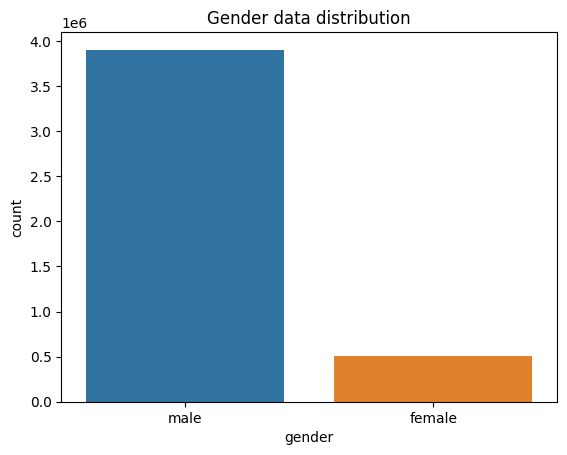

In [43]:
df['gender'].value_counts()
print("Total gender counts = ", df['gender'].value_counts()[0])
ax = sns.countplot(x=df['gender']).set(title='Gender data distribution')

In [45]:
df.to_csv('data/dblp/prep_data.csv', index=False)